In [9]:
test_df = get_price('000001.SZ', '20200103', '20230103',fields=['close', 'open', 'low', 'high'])
# df['code']
type(test_df)

pandas.core.frame.DataFrame

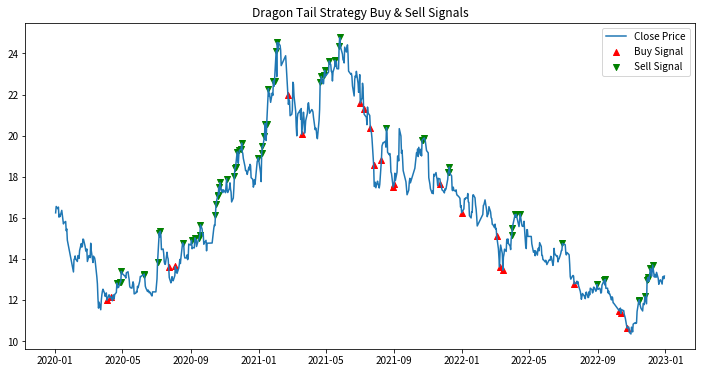

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def get_stock_data(securities, start_date, end_date):
    fields = ['close', 'high', 'low', 'volume']
    stock_data = get_price(securities, start_date=start_date, end_date=end_date, fields=fields)
    return pd.DataFrame(stock_data)

def detect_pullback(stock_data, period):
    stock_data['period_high'] = stock_data['close'].rolling(window=period).max()
    stock_data['pullback'] = (stock_data['period_high'] - stock_data['close']) / stock_data['period_high'] * 100
    return stock_data

# def dragon_tail_strategy(stock_data, pullback_threshold, volume_increase=1.5):
#     signals = []
#     for i in range(1, len(stock_data)):
#         if (stock_data['pullback'][i] > pullback_threshold and 
#             stock_data['volume'][i] > stock_data['volume'][i-1] * volume_increase):
#             signals.append(i)
#     return signals

def dragon_tail_strategy(stock_data, pullback_threshold=20, volume_increase=1.5, sell_threshold=0.95):
    buy_signals = []
    sell_signals = []
    for i in range(1, len(stock_data)):
        # 买入信号：回调幅度超过20%且成交量增加
        if (stock_data['pullback'][i] > pullback_threshold and 
            stock_data['volume'][i] > stock_data['volume'][i-1] * volume_increase):
            buy_signals.append(i)
        # 卖出信号：反弹达到前高的95%或成交量下降
        elif stock_data['close'][i] >= stock_data['period_high'][i] * sell_threshold:
            sell_signals.append(i)
    return buy_signals, sell_signals

def plot_signals(stock_data, buy_signals, sell_signals):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data['close'], label='Close Price')
    plt.scatter(stock_data.iloc[buy_signals].index, stock_data.iloc[buy_signals]['close'], color='red', marker='^', label='Buy Signal')
    plt.scatter(stock_data.iloc[sell_signals].index, stock_data.iloc[sell_signals]['close'], color='green', marker='v', label='Sell Signal')
    plt.title('Dragon Tail Strategy Buy & Sell Signals')
    plt.legend()
    plt.show()

securities = '000001.SZ' 
start_date = '20200101'
end_date = '20230101'
period = 20

stock_data = get_stock_data(securities, start_date, end_date)
stock_data = detect_pullback(stock_data, period)

buy_signals, sell_signals = dragon_tail_strategy(stock_data, pullback_threshold=10, sell_threshold=1.0)

plot_signals(stock_data, buy_signals, sell_signals)

In [24]:
print(len(buy_signals)-len(sell_signals))

-449
